In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score,train_test_split

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor,GradientBoostingRegressor

In [96]:
train = pd.read_csv('./data/house_train.csv')
test = pd.read_csv('./data/house_test.csv')

In [97]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [98]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [99]:
train['idx'] = 0
test['idx']= 1

In [100]:
data = pd.concat([train,test],axis=0)

In [101]:
data.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,idx
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,0


In [102]:
data.drop(['Id'],axis=1,inplace=True)

In [103]:
data.isnull().sum()[data.isnull().sum()>0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

In [104]:
cols = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType','MSSubClass']
for col in cols:
    data[col] = data[col].fillna('None')

In [105]:
cols = ['GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',"MasVnrArea"]
for col in cols:
    data[col] = data[col].fillna(0)

In [106]:
cols = ['MSZoning','Electrical','KitchenQual','Exterior1st','Exterior2nd','SaleType']
for col in cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [107]:
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [108]:
data["Functional"] = data["Functional"].fillna("Typ")

In [109]:
data = data.drop(['Utilities'], axis=1)

In [110]:
data.isnull().sum()[data.isnull().sum()>0]

SalePrice    1459
dtype: int64

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

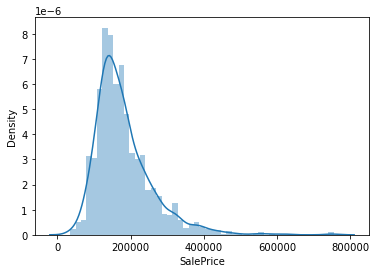

In [111]:
sns.distplot(data['SalePrice'])

In [112]:
data['SalePrice'] = np.log(data['SalePrice'])

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

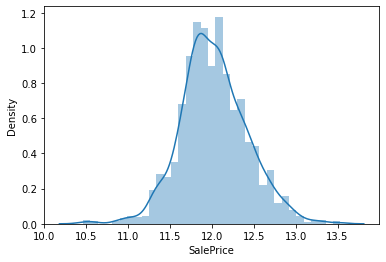

In [113]:
sns.distplot(data['SalePrice'])

In [114]:
data = pd.get_dummies(data)

In [115]:
data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [116]:
train = data[data.idx == 0]
test = data[data.idx ==1]

In [117]:
cols = list(train.columns)

In [118]:
cols.remove('SalePrice')

In [119]:
X = train[cols]
y = train['SalePrice'].values

In [120]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3)

In [121]:
train_X.isnull().sum()[train_X.isnull().sum()>0]

Series([], dtype: int64)

In [122]:
test_X.isnull().sum()[test_X.isnull().sum()>0]

Series([], dtype: int64)

In [123]:
rg1 = LinearRegression()
rg2 = DecisionTreeRegressor()
rg3 = RandomForestRegressor()
rg4 = ExtraTreesRegressor()
rg5 = GradientBoostingRegressor()

In [124]:
models = [rg1,rg2,rg3,rg4,rg5]
for model in models:
    m = model.fit(train_X, train_y)
    y_pred = m.predict(test_X)
    score = mean_squared_error(test_y,y_pred)
    print(f'mse of {str(m)} is {score}')
    

mse of LinearRegression() is 0.03616567603185651
mse of DecisionTreeRegressor() is 0.03981041312789399
mse of RandomForestRegressor() is 0.019128462823318607
mse of ExtraTreesRegressor() is 0.020159980702311297
mse of GradientBoostingRegressor() is 0.01734217382534394


In [132]:
n_folds = 5
def mse_cv(model):
    kf= KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train_X.values)
    mse= -cross_val_score(model,train_X,train_y,scoring='neg_mean_squared_error',cv=kf)
    return mse

In [134]:
models = [rg1,rg2,rg3,rg4,rg5]
for model in models:
    score = mse_cv(model)
    print(f'mse of {str(model)} is {score.mean()}')

mse of LinearRegression() is 0.031193239532928314
mse of DecisionTreeRegressor() is 0.043701971683827626
mse of RandomForestRegressor() is 0.02211611861057398
mse of ExtraTreesRegressor() is 0.023427030942422895
mse of GradientBoostingRegressor() is 0.01754024898395663
